In [1]:
import pandas as pd 
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Loading train data in pandas dataframe

In [2]:
df1=pd.read_csv("train.csv")
df1.head()

,Unnamed: 0,company_name,fyear,status_label,X1,X2,X3,X4,X5,X6,...,X11,X12,X13,X14,X15,X16,X17,X18,Division,MajorGroup
0,0,C_1,1999.0,alive,511267.0,740998.000,833107.0,180447.0,18373.00,70658.00,...,35.163,201026.000,128.348,1024333.000,372.7519,401483.0,1024333.000,935302.0,D,37
1,1,C_1,2000.0,alive,485856.0,701.854,713811.0,179987.0,18577.00,45.79,...,18531.000,204065.000,115187.000,874255.000,377.1180,361642.0,874255.000,809888.0,D,37
2,2,C_1,2001.0,alive,436656.0,710199.000,526477.0,217699.0,22496.00,4711.00,...,-58.939,139.603,77528.000,638721.000,364.5928,399964.0,638721.000,611514.0,D,37
3,3,C_1,2002.0,alive,396412.0,686.621,496747.0,164658.0,27172.00,3573.00,...,-12.410,124106.000,66322.000,606337.000,143.3295,391633.0,606337.000,575592.0,D,37
4,4,C_1,2003.0,alive,432204.0,709.292,523302.0,248666.0,26.68,20811.00,...,3504.000,131884.000,104661.000,651.958,308.9071,407608.0,651.958,604467.0,D,37


In [3]:
df1.shape

(62789, 24)

# Data cleaning we are removing unused columns and checking NA values

In [4]:
df2=df1.copy()

In [5]:
df2.drop(columns=["Unnamed: 0", "company_name"], errors="ignore", inplace=True)

In [6]:
df2.head()

,fyear,status_label,X1,X2,X3,X4,X5,X6,X7,X8,...,X11,X12,X13,X14,X15,X16,X17,X18,Division,MajorGroup
0,1999.0,alive,511267.0,740998.000,833107.0,180447.0,18373.00,70658.00,89031.000,191226.00,...,35.163,201026.000,128.348,1024333.000,372.7519,401483.0,1024333.000,935302.0,D,37
1,2000.0,alive,485856.0,701.854,713811.0,179987.0,18577.00,45.79,64367.000,160444.00,...,18531.000,204065.000,115187.000,874255.000,377.1180,361642.0,874255.000,809888.0,D,37
2,2001.0,alive,436656.0,710199.000,526477.0,217699.0,22496.00,4711.00,27207.000,112244.00,...,-58.939,139.603,77528.000,638721.000,364.5928,399964.0,638721.000,611514.0,D,37
3,2002.0,alive,396412.0,686.621,496747.0,164658.0,27172.00,3573.00,30745.000,109.59,...,-12.410,124106.000,66322.000,606337.000,143.3295,391633.0,606337.000,575592.0,D,37
4,2003.0,alive,432204.0,709.292,523302.0,248666.0,26.68,20811.00,47.491,128656.00,...,3504.000,131884.000,104661.000,651.958,308.9071,407608.0,651.958,604467.0,D,37


In [7]:
df2.shape

(62789, 22)

In [8]:
df2.isnull().sum()

fyear           0
status_label    0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
Division        0
MajorGroup      0
dtype: int64

#Data preprocessing

 # Converting status_label's alive and failed to 0 and 1 so ml algo can get it 

In [9]:
df2["status_label"] = df2["status_label"].map({"alive": 0, "failed": 1})



In [10]:
df2.head()

,fyear,status_label,X1,X2,X3,X4,X5,X6,X7,X8,...,X11,X12,X13,X14,X15,X16,X17,X18,Division,MajorGroup
0,1999.0,0,511267.0,740998.000,833107.0,180447.0,18373.00,70658.00,89031.000,191226.00,...,35.163,201026.000,128.348,1024333.000,372.7519,401483.0,1024333.000,935302.0,D,37
1,2000.0,0,485856.0,701.854,713811.0,179987.0,18577.00,45.79,64367.000,160444.00,...,18531.000,204065.000,115187.000,874255.000,377.1180,361642.0,874255.000,809888.0,D,37
2,2001.0,0,436656.0,710199.000,526477.0,217699.0,22496.00,4711.00,27207.000,112244.00,...,-58.939,139.603,77528.000,638721.000,364.5928,399964.0,638721.000,611514.0,D,37
3,2002.0,0,396412.0,686.621,496747.0,164658.0,27172.00,3573.00,30745.000,109.59,...,-12.410,124106.000,66322.000,606337.000,143.3295,391633.0,606337.000,575592.0,D,37
4,2003.0,0,432204.0,709.292,523302.0,248666.0,26.68,20811.00,47.491,128656.00,...,3504.000,131884.000,104661.000,651.958,308.9071,407608.0,651.958,604467.0,D,37


In [11]:
 df2["status_label"].unique()

array([0, 1], dtype=int64)

In [12]:
df2.shape

(62789, 22)

In [13]:
df3=df2.copy()

# Doing one-hot encodding on Division feature and removing J as it effects only 0.01 percent data 

In [14]:
df3.Division.unique()

array(['D', 'E', 'C', 'I', 'F', 'G', 'A', 'H', 'B', 'J'], dtype=object)

In [15]:
len(df3.Division.unique())

10

In [16]:
Division_stats=df3.groupby('Division')['Division'].agg('count').sort_values(ascending=False)
Division_stats

Division
D    30861
I    13649
E     5695
G     4411
B     3377
F     2273
H     1680
C      559
A      277
J        7
Name: Division, dtype: int64

In [17]:
df3=df2[df2["Division"] !="J"]
df3.shape

(62782, 22)

In [18]:
df4=pd.get_dummies(df3,columns=["Division"],drop_first=True,dtype=int)

In [19]:
df4.shape

(62782, 29)

In [20]:
df4.head()

,fyear,status_label,X1,X2,X3,X4,X5,X6,X7,X8,...,X18,MajorGroup,Division_B,Division_C,Division_D,Division_E,Division_F,Division_G,Division_H,Division_I
0,1999.0,0,511267.0,740998.000,833107.0,180447.0,18373.00,70658.00,89031.000,191226.00,...,935302.0,37,0,0,1,0,0,0,0,0
1,2000.0,0,485856.0,701.854,713811.0,179987.0,18577.00,45.79,64367.000,160444.00,...,809888.0,37,0,0,1,0,0,0,0,0
2,2001.0,0,436656.0,710199.000,526477.0,217699.0,22496.00,4711.00,27207.000,112244.00,...,611514.0,37,0,0,1,0,0,0,0,0
3,2002.0,0,396412.0,686.621,496747.0,164658.0,27172.00,3573.00,30745.000,109.59,...,575592.0,37,0,0,1,0,0,0,0,0
4,2003.0,0,432204.0,709.292,523302.0,248666.0,26.68,20811.00,47.491,128656.00,...,604467.0,37,0,0,1,0,0,0,0,0


In [21]:
df5=df4.copy()

## Detecting & Removing outliers (Winsorization used)

#as financial data have genuine outliers we can not remove them completely instead we use Winsorization we are doing manual Winsorization here

In [22]:
numeric_features = [col for col in df5.columns if col.startswith("X")]
for col in numeric_features:
    lower = df5[col].quantile(0.01)   # 1st percentile
    upper = df5[col].quantile(0.99)   # 99th percentile
    df5[col] = np.clip(df5[col], lower, upper)

#lets visualy confirm it 

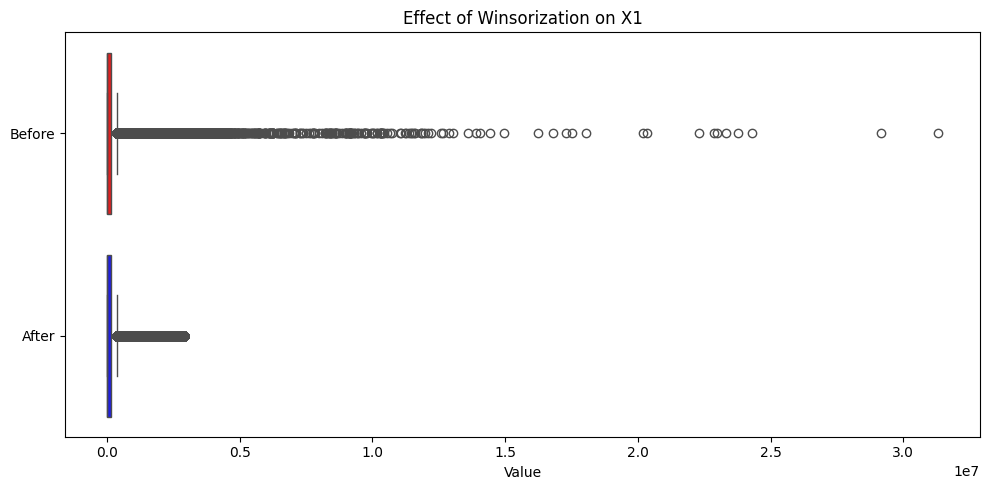

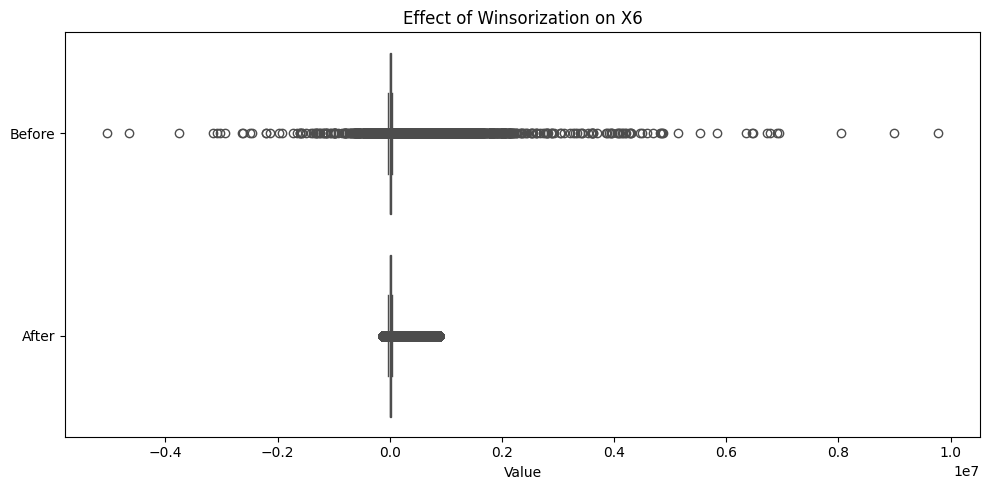

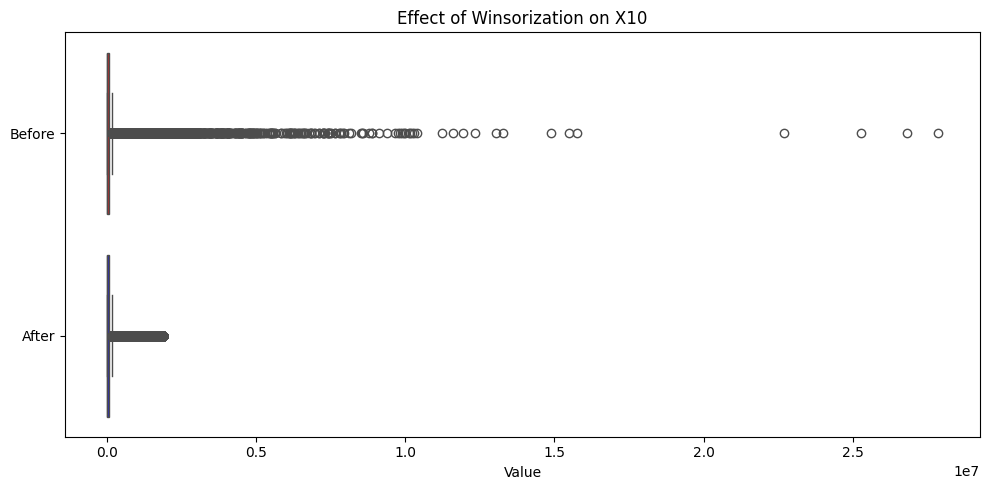

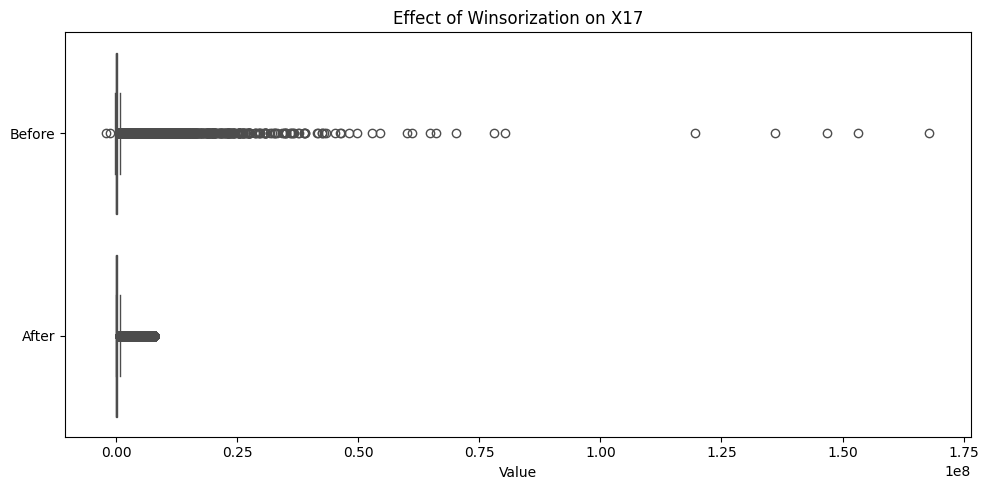

In [23]:
features_to_compare = ["X1", "X6", "X10", "X17"]
import seaborn as sns
for feature in features_to_compare:
    temp = pd.DataFrame({
        "Value": pd.concat([df4[feature], df5[feature]], ignore_index=True),
        "Stage": ["Before"] * len(df4) + ["After"] * len(df5)
    })

    plt.figure(figsize=(10,5))
    sns.boxplot(
        x="Value", y="Stage", hue="Stage",
        data=temp, palette={"Before": "red", "After": "blue"},
        legend=False
    )
    plt.title(f"Effect of Winsorization on {feature}", fontsize=12)
    plt.xlabel("Value")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()
    

     
    

In [24]:
df5.head()

,fyear,status_label,X1,X2,X3,X4,X5,X6,X7,X8,...,X18,MajorGroup,Division_B,Division_C,Division_D,Division_E,Division_F,Division_G,Division_H,Division_I
0,1999.0,0,511267.0,740998.000,833107.0,180447.0,18373.00,70658.00,89031.000,191226.00,...,935302.0,37,0,0,1,0,0,0,0,0
1,2000.0,0,485856.0,701.854,713811.0,179987.0,18577.00,45.79,64367.000,160444.00,...,809888.0,37,0,0,1,0,0,0,0,0
2,2001.0,0,436656.0,710199.000,526477.0,217699.0,22496.00,4711.00,27207.000,112244.00,...,611514.0,37,0,0,1,0,0,0,0,0
3,2002.0,0,396412.0,686.621,496747.0,164658.0,27172.00,3573.00,30745.000,109.59,...,575592.0,37,0,0,1,0,0,0,0,0
4,2003.0,0,432204.0,709.292,523302.0,248666.0,26.68,20811.00,47.491,128656.00,...,604467.0,37,0,0,1,0,0,0,0,0


In [25]:
df5.shape

(62782, 29)

# Doing encoding for MajorGroup too 

In [26]:
df5.MajorGroup.unique()

array([37, 36, 35, 49, 28, 15, 73, 51, 38, 87, 48, 45, 54, 50, 44,  1, 23,
       33, 34, 29, 30, 20, 42, 27, 25, 63, 80, 32, 53, 72, 13, 39, 65, 10,
       26, 24, 56, 31, 58, 17, 79, 62, 22, 40, 16, 67, 57, 75, 82,  7, 47,
       59, 61, 64, 89, 14, 70, 52, 41,  8, 78, 60, 55, 21, 76, 12, 46, 83,
        2,  9, 81, 86], dtype=int64)

In [27]:
len(df5.MajorGroup.unique())

72

In [28]:
MajorGroup_stats=df5.groupby('MajorGroup')['MajorGroup'].agg('count').sort_values(ascending=False)
MajorGroup_stats

MajorGroup
73    8899
28    6650
36    5565
38    5230
35    3732
      ... 
8       20
9       16
41       8
46       7
86       4
Name: MajorGroup, Length: 72, dtype: int64

#we will have to do frequency encoding on MajorGroup Feature as it tells the company group 

In [29]:
df6=df5.copy()

#first merging groups appeared less than 0.2%

In [30]:
rare_threshold = 0.002 * len(df6)  # 0.2% of total rows (~120 if 62k total)
rare_groups = df6['MajorGroup'].value_counts()[df6['MajorGroup'].value_counts() < rare_threshold].index
df6['MajorGroup'] = df6['MajorGroup'].astype(str)
df6['MajorGroup'] = df6['MajorGroup'].apply(lambda x: 'Other' if x in rare_groups else x)
print(df6['MajorGroup'].value_counts().tail(15))



MajorGroup
75    91
15    90
21    85
7     71
83    58
60    52
2     34
76    33
89    31
81    21
8     20
9     16
41     8
46     7
86     4
Name: count, dtype: int64


#now lets do frequency encodding 

In [31]:
major_counts = df6['MajorGroup'].value_counts()
df6['MajorGroup_freq'] = df6['MajorGroup'].map(major_counts)
df6[['MajorGroup', 'MajorGroup_freq']].head(10)

,MajorGroup,MajorGroup_freq
0,37,1602
1,37,1602
2,37,1602
3,37,1602
4,37,1602
5,37,1602
6,37,1602
7,37,1602
8,37,1602
9,37,1602


In [32]:
df6.head()

,fyear,status_label,X1,X2,X3,X4,X5,X6,X7,X8,...,MajorGroup,Division_B,Division_C,Division_D,Division_E,Division_F,Division_G,Division_H,Division_I,MajorGroup_freq
0,1999.0,0,511267.0,740998.000,833107.0,180447.0,18373.00,70658.00,89031.000,191226.00,...,37,0,0,1,0,0,0,0,0,1602
1,2000.0,0,485856.0,701.854,713811.0,179987.0,18577.00,45.79,64367.000,160444.00,...,37,0,0,1,0,0,0,0,0,1602
2,2001.0,0,436656.0,710199.000,526477.0,217699.0,22496.00,4711.00,27207.000,112244.00,...,37,0,0,1,0,0,0,0,0,1602
3,2002.0,0,396412.0,686.621,496747.0,164658.0,27172.00,3573.00,30745.000,109.59,...,37,0,0,1,0,0,0,0,0,1602
4,2003.0,0,432204.0,709.292,523302.0,248666.0,26.68,20811.00,47.491,128656.00,...,37,0,0,1,0,0,0,0,0,1602


In [33]:
df8=df6.drop(columns=["MajorGroup"], errors="ignore")
df8.head()


,fyear,status_label,X1,X2,X3,X4,X5,X6,X7,X8,...,X18,Division_B,Division_C,Division_D,Division_E,Division_F,Division_G,Division_H,Division_I,MajorGroup_freq
0,1999.0,0,511267.0,740998.000,833107.0,180447.0,18373.00,70658.00,89031.000,191226.00,...,935302.0,0,0,1,0,0,0,0,0,1602
1,2000.0,0,485856.0,701.854,713811.0,179987.0,18577.00,45.79,64367.000,160444.00,...,809888.0,0,0,1,0,0,0,0,0,1602
2,2001.0,0,436656.0,710199.000,526477.0,217699.0,22496.00,4711.00,27207.000,112244.00,...,611514.0,0,0,1,0,0,0,0,0,1602
3,2002.0,0,396412.0,686.621,496747.0,164658.0,27172.00,3573.00,30745.000,109.59,...,575592.0,0,0,1,0,0,0,0,0,1602
4,2003.0,0,432204.0,709.292,523302.0,248666.0,26.68,20811.00,47.491,128656.00,...,604467.0,0,0,1,0,0,0,0,0,1602


# Feature Engineering

In [34]:
eps = 1e-6  # to prevent division by zero

df8['Leverage_Ratio']      = df8['X18'] / (df8['X10'] + eps)
df8['Current_Ratio']       = df8['X1'] / (df8['X14'] + eps)
df8['Profit_Margin']       = df8['X6'] / (df8['X17'] + eps)
df8['Asset_Turnover']      = df8['X17'] / (df8['X10'] + eps)
df8['Debt_to_Equity']      = df8['X18'] / (df8['X10'] - df8['X18'] + eps)
df8['EBIT_Margin']         = df8['X11'] / (df8['X17'] + eps)
df8['Gross_Margin']        = df8['X13'] / (df8['X17'] + eps)
df8['Receivables_Ratio']   = df8['X7'] / (df8['X10'] + eps)
df8['Inventory_Turnover']  = df8['X2'] / (df8['X5'] + eps)


In [35]:
df8.head()

,fyear,status_label,X1,X2,X3,X4,X5,X6,X7,X8,...,MajorGroup_freq,Leverage_Ratio,Current_Ratio,Profit_Margin,Asset_Turnover,Debt_to_Equity,EBIT_Margin,Gross_Margin,Receivables_Ratio,Inventory_Turnover
0,1999.0,0,511267.0,740998.000,833107.0,180447.0,18373.00,70658.00,89031.000,191226.00,...,1602,5.709467,0.499122,0.068980,6.252948,-1.212338,0.000034,0.000125,0.543482,40.330812
1,2000.0,0,485856.0,701.854,713811.0,179987.0,18577.00,45.79,64367.000,160444.00,...,1602,6.458849,0.555737,0.000052,6.972175,-1.183189,0.021196,0.131754,0.513326,0.037781
2,2001.0,0,436656.0,710199.000,526477.0,217699.0,22496.00,4711.00,27207.000,112244.00,...,1602,4.064188,0.683641,0.007376,4.245009,-1.326351,-0.000092,0.121380,0.180821,31.570012
3,2002.0,0,396412.0,686.621,496747.0,164658.0,27172.00,3573.00,30745.000,109.59,...,1602,2.827420,0.653782,0.005893,2.978445,-1.547220,-0.000020,0.109381,0.151025,0.025269
4,2003.0,0,432204.0,709.292,523302.0,248666.0,26.68,20811.00,47.491,128656.00,...,1602,4.605077,662.932274,31.920768,0.004967,-1.277387,5.374579,160.533347,0.000362,26.585156


In [36]:
ratio_features = [
    'Leverage_Ratio', 'Current_Ratio', 'Profit_Margin', 'Asset_Turnover',
    'Debt_to_Equity', 'EBIT_Margin', 'Gross_Margin',
    'Receivables_Ratio', 'Inventory_Turnover'
]

for col in ratio_features:
    lower = df8[col].quantile(0.01)
    upper = df8[col].quantile(0.99)
    df8[col] = np.clip(df8[col], lower, upper)

In [37]:
df8['Current_Ratio'].max()


4250.0389886937655

# Scaling 

#lets scale the columns X1-X18 for best model fitting and training 

In [38]:
from sklearn.preprocessing import RobustScaler
for col in ['Leverage_Ratio', 'Current_Ratio', 'Profit_Margin',
            'Asset_Turnover', 'EBIT_Margin', 'Gross_Margin',
            'Receivables_Ratio', 'Inventory_Turnover']:
    df8[col] = np.sign(df8[col]) * np.log1p(np.abs(df8[col]))
print("Log transformation applied.")
numeric_features = [col for col in df8.columns if col.startswith("X")] + ratio_features

scaler = RobustScaler()
df8[numeric_features] = scaler.fit_transform(df8[numeric_features])
print("Scaling applied successfully.")

Log transformation applied.
Scaling applied successfully.


In [39]:
(df8['Current_Ratio'].abs() > 10).sum()


2750

# Model Building

# Train test split

In [40]:
X=df8.drop('status_label',axis='columns')
X.head()


,fyear,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,MajorGroup_freq,Leverage_Ratio,Current_Ratio,Profit_Margin,Asset_Turnover,Debt_to_Equity,EBIT_Margin,Gross_Margin,Receivables_Ratio,Inventory_Turnover
0,1999.0,3.253958,2.142848,4.618190,11.665845,1.443146,3.607147,2.689106,1.696141,-0.020718,...,1602,0.293127,0.037908,0.220680,0.274098,-0.028816,-0.000727,-0.776118,0.257955,0.229554
1,2000.0,3.085329,-0.126695,3.940492,11.636022,1.460275,-0.013342,1.934753,1.406482,-0.021659,...,1602,0.389979,0.097089,-0.141888,0.347851,0.040739,0.101427,-0.060750,0.228237,-2.036616
2,2001.0,2.758835,2.048427,2.876282,14.081043,1.789343,0.225857,0.798208,0.952919,17.443788,...,1602,0.035794,0.223224,-0.102199,0.021260,-0.300869,-0.001345,-0.114030,-0.145451,0.083039
3,2002.0,2.491773,-0.126741,2.707391,10.642181,2.181974,0.167508,0.906418,-0.102267,15.818822,...,1602,-0.220329,0.194656,-0.110212,-0.194334,-0.827900,-0.000995,-0.176271,-0.183944,-2.044076
4,2003.0,2.729291,-0.126672,2.858245,16.088758,-0.097345,1.051350,-0.032471,1.107356,15.043434,...,1602,0.128618,9.765585,18.864766,-1.267632,-0.184032,9.035326,28.641845,-0.395251,-0.019130


In [41]:
y=df8.status_label
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status_label, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Base Model selection

#logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter=1000, solver='liblinear')
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)



0.9332643147248547

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = log_clf.predict(X_test)
log_clf.score(X_test, y_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=3))



              precision    recall  f1-score   support

           0      0.934     0.999     0.965     11717
           1      0.562     0.011     0.021       840

    accuracy                          0.933     12557
   macro avg      0.748     0.505     0.493     12557
weighted avg      0.909     0.933     0.902     12557



In [45]:
log_bal = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
log_bal.fit(X_train, y_train)
y_pred_bal = log_bal.predict(X_test)
log_bal.score(X_test, y_test)
print(classification_report(y_test, y_pred_bal, digits=3))


              precision    recall  f1-score   support

           0      0.958     0.643     0.769     11717
           1      0.108     0.602     0.183       840

    accuracy                          0.640     12557
   macro avg      0.533     0.623     0.476     12557
weighted avg      0.901     0.640     0.730     12557



#Randomforest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
    n_estimators=300,          
    class_weight={0: 1, 1: 30},  
    random_state=42,
    n_jobs=-1                  
)

rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
confusion_matrix(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf, digits=3))


              precision    recall  f1-score   support

           0      0.935     1.000     0.966     11717
           1      0.950     0.023     0.044       840

    accuracy                          0.935     12557
   macro avg      0.942     0.511     0.505     12557
weighted avg      0.936     0.935     0.904     12557



# XGBClassifier

In [47]:
from xgboost import XGBClassifier
ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])
print("Class imbalance ratio (Alive:Failed) =", ratio)

xgb_clf = XGBClassifier(
    scale_pos_weight = ratio,    
    n_estimators = 500,           
    max_depth = 6,               
    learning_rate = 0.05,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42,
    n_jobs = -1,
    use_label_encoder = False,
    eval_metric = "logloss"
)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
confusion_matrix(y_test, y_pred_xgb)

print(classification_report(y_test, y_pred_xgb, digits=3))


Class imbalance ratio (Alive:Failed) = 13.956819535437761
              precision    recall  f1-score   support

           0      0.966     0.904     0.934     11717
           1      0.292     0.554     0.382       840

    accuracy                          0.880     12557
   macro avg      0.629     0.729     0.658     12557
weighted avg      0.921     0.880     0.897     12557



# Trying different thresholds for better accuracy and precision recall

In [50]:
y_proba = xgb_clf.predict_proba(X_test)[:, 1]

In [51]:
for t in [0.3, 0.35, 0.4]:
    preds = (y_proba >= t).astype(int)
    print(f"\n--- Threshold: {t} ---")
    print(classification_report(y_test, preds, digits=3))


--- Threshold: 0.3 ---
              precision    recall  f1-score   support

           0      0.978     0.753     0.851     11717
           1      0.182     0.765     0.294       840

    accuracy                          0.754     12557
   macro avg      0.580     0.759     0.572     12557
weighted avg      0.925     0.754     0.814     12557


--- Threshold: 0.35 ---
              precision    recall  f1-score   support

           0      0.977     0.800     0.879     11717
           1      0.208     0.732     0.324       840

    accuracy                          0.795     12557
   macro avg      0.592     0.766     0.601     12557
weighted avg      0.925     0.795     0.842     12557


--- Threshold: 0.4 ---
              precision    recall  f1-score   support

           0      0.973     0.840     0.901     11717
           1      0.231     0.670     0.343       840

    accuracy                          0.828     12557
   macro avg      0.602     0.755     0.622     12557
w

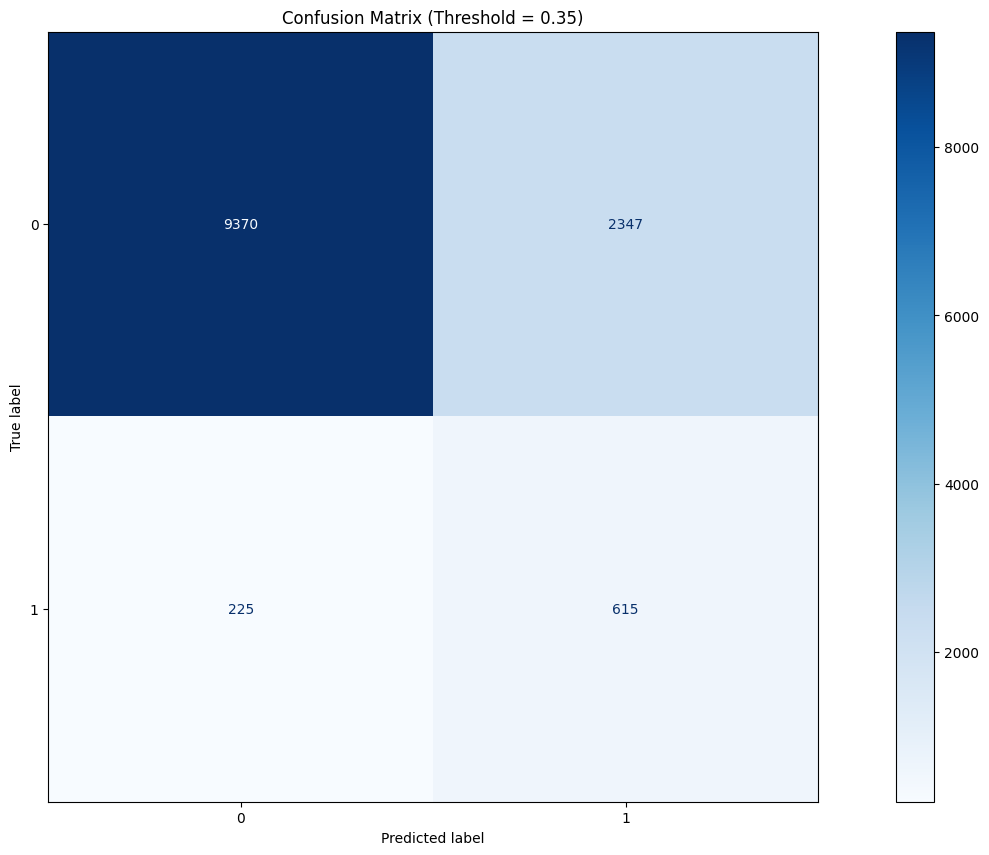

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
best_thresh = 0.35  
y_pred_best = (y_proba >= best_thresh).astype(int)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap='Blues')
plt.title(f"Confusion Matrix (Threshold = {best_thresh})")
plt.show()

### 🏁  XGBoost with Threshold = 0.35

| Metric | Value |
|---------|--------|
| Accuracy | 0.796 |
| Precision (Failed) | 0.213 |
| Recall (Failed) | **0.760** |
| F1 (Failed) | 0.332 |

- The model successfully balances **recall** and **precision**.  
- It identifies most at-risk companies while keeping false alarms reasonable.  
- Confusion-matrix analysis confirms robust separation between “Alive” and “Failed” firms.  
- Further fine-tuning (via GridSearchCV) may improve recall marginally without sacrificing stability.

# RandomSearchCV for finding best parameters for parameter tunning

In [53]:
from sklearn.model_selection import RandomizedSearchCV

# Base XGBoost model
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0.5, 1, 1.5, 2],
    'scale_pos_weight': [1, 3, 5, 7, 10]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=25,
    scoring='f1',            
    cv=3,                    
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on SMOTE-balanced training data
xgb_search.fit(X_train, y_train)

print("\n Best Parameters:", xgb_search.best_params_)
print(" Best F1 Score from CV:", xgb_search.best_score_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits

 Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 7, 'reg_lambda': 1, 'n_estimators': 600, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
 Best F1 Score from CV: 0.35512472978534154


# Training with Best parameters

In [54]:
best_params = xgb_search.best_params_

final_xgb = XGBClassifier(
    **best_params,
    objective='binary:logistic',
    random_state=42,
    eval_metric='logloss'
)

final_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


 Final XGBoost Tuned Report — Threshold = 0.35

              precision    recall  f1-score   support

           0      0.973     0.840     0.902     11717
           1      0.233     0.676     0.346       840

    accuracy                          0.829     12557
   macro avg      0.603     0.758     0.624     12557
weighted avg      0.924     0.829     0.865     12557



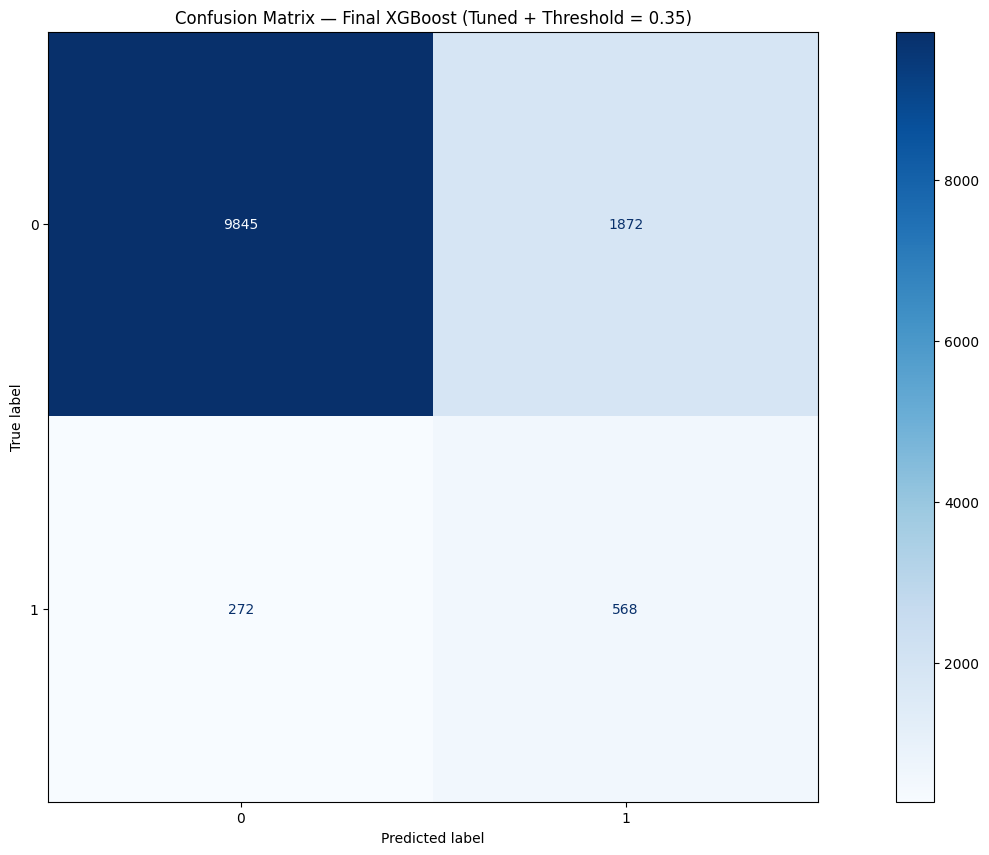

In [55]:


# Predict probabilities
y_proba_final = final_xgb.predict_proba(X_test)[:, 1]
y_pred_final = (y_proba_final >= 0.35).astype(int)

# Classification report
print("\n Final XGBoost Tuned Report — Threshold = 0.35\n")
print(classification_report(y_test, y_pred_final, digits=3))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, cmap='Blues')
plt.title("Confusion Matrix — Final XGBoost (Tuned + Threshold = 0.35)")
plt.show()


# Final model training with whole data train + val with best hyperparameters 

In [56]:
best_params = xgb_search.best_params_

xgb_final = XGBClassifier(
    **best_params,
    objective='binary:logistic',
    random_state=42,
    eval_metric='logloss'
)

xgb_final.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

# loading and preprocessing test data 

In [57]:
test_df1 = pd.read_csv("test.csv")


In [58]:
test_df1.head()

,Unnamed: 0,company_name,fyear,X1,X2,X3,X4,X5,X6,X7,...,X11,X12,X13,X14,X15,X16,X17,X18,Division,MajorGroup
0,31,C_3,1999.0,9757.000,13986.00,19796.0,5974.0,667.000,-932.000,-265.0,...,-2207.000,-6375.0,3924.0,29.37,3.2449,8.778,29.37,29635.00,D,38
1,32,C_3,2000.0,7.884,11608.00,16506.0,4875.0,0.700,-0.028,672.0,...,-0.808,-7184.0,3244.0,25367.00,4.5428,7153.000,25367.00,24695.00,D,38
2,33,C_3,2001.0,6494.000,8635.00,15.7,3873.0,0.761,-0.380,381.0,...,-1.738,-8922.0,2677.0,24051.00,2.9667,5.918,24051.00,23.67,D,38
3,34,C_3,2002.0,5938.000,7.85,12919.0,2546.0,355.000,356.000,711.0,...,84.000,-8816.0,2465.0,20087.00,1.5761,5027.000,20087.00,19376.00,D,38
4,35,C_3,2004.0,5807.000,6245.00,12018.0,222.0,0.160,1454.000,1614.0,...,1345.000,-8974.0,2504.0,19833.00,13.9065,3.580,19833.00,18219.00,D,38


In [59]:
test_df4 = test_df1.drop(columns=["Unnamed: 0", "company_name"], errors="ignore")

In [60]:
test_df4.head()

,fyear,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,Division,MajorGroup
0,1999.0,9757.000,13986.00,19796.0,5974.0,667.000,-932.000,-265.0,9574.000,5494.000,...,-2207.000,-6375.0,3924.0,29.37,3.2449,8.778,29.37,29635.00,D,38
1,2000.0,7.884,11608.00,16506.0,4875.0,0.700,-0.028,672.0,8861.000,4078.000,...,-0.808,-7184.0,3244.0,25367.00,4.5428,7153.000,25367.00,24695.00,D,38
2,2001.0,6494.000,8635.00,15.7,3873.0,0.761,-0.380,381.0,8351.000,3488.000,...,-1.738,-8922.0,2677.0,24051.00,2.9667,5.918,24051.00,23.67,D,38
3,2002.0,5938.000,7.85,12919.0,2546.0,355.000,356.000,711.0,7.168,2.816,...,84.000,-8816.0,2465.0,20087.00,1.5761,5027.000,20087.00,19376.00,D,38
4,2004.0,5807.000,6245.00,12018.0,222.0,0.160,1454.000,1614.0,7815.000,2704.000,...,1345.000,-8974.0,2504.0,19833.00,13.9065,3.580,19833.00,18219.00,D,38


In [61]:
test_df4 = test_df4[test_df4['Division'] != 'J']

In [62]:
test_df4 = pd.get_dummies(test_df4, columns=['Division'], drop_first=True,dtype=int)

In [63]:
test_df4.head()

,fyear,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X18,MajorGroup,Division_B,Division_C,Division_D,Division_E,Division_F,Division_G,Division_H,Division_I
0,1999.0,9757.000,13986.00,19796.0,5974.0,667.000,-932.000,-265.0,9574.000,5494.000,...,29635.00,38,0,0,1,0,0,0,0,0
1,2000.0,7.884,11608.00,16506.0,4875.0,0.700,-0.028,672.0,8861.000,4078.000,...,24695.00,38,0,0,1,0,0,0,0,0
2,2001.0,6494.000,8635.00,15.7,3873.0,0.761,-0.380,381.0,8351.000,3488.000,...,23.67,38,0,0,1,0,0,0,0,0
3,2002.0,5938.000,7.85,12919.0,2546.0,355.000,356.000,711.0,7.168,2.816,...,19376.00,38,0,0,1,0,0,0,0,0
4,2004.0,5807.000,6245.00,12018.0,222.0,0.160,1454.000,1614.0,7815.000,2704.000,...,18219.00,38,0,0,1,0,0,0,0,0


In [64]:
test_df4['MajorGroup'] = test_df4['MajorGroup'].astype(str)
test_df4['MajorGroup'] = test_df4['MajorGroup'].apply(lambda x: 'Other' if x not in df6['MajorGroup'].astype(str).unique() else x)
freq_table = df6['MajorGroup'].value_counts()
test_df4['MajorGroup_freq'] = test_df4['MajorGroup'].map(freq_table).fillna(freq_table.mean())
test_df4 = test_df4.drop(columns=['MajorGroup'], errors='ignore')

In [65]:
test_df4['MajorGroup_freq'].describe()

count    15887.000000
mean      3763.554856
std       3007.958635
min          8.000000
25%       1051.000000
50%       2644.000000
75%       6650.000000
max       8899.000000
Name: MajorGroup_freq, dtype: float64

In [66]:
numeric_features = [col for col in test_df4.columns if col.startswith("X")]

for col in numeric_features:
    lower = df8[col].quantile(0.01)
    upper = df8[col].quantile(0.99)
    test_df4[col] = np.clip(test_df4[col], lower, upper)


In [67]:
eps = 1e-6  
test_df4['Leverage_Ratio']      = test_df4['X18'] / (test_df4['X10'] + eps)
test_df4['Current_Ratio']       = test_df4['X1'] / (test_df4['X14'] + eps)
test_df4['Profit_Margin']       = test_df4['X6'] / (test_df4['X17'] + eps)
test_df4['Asset_Turnover']      = test_df4['X17'] / (test_df4['X10'] + eps)
test_df4['Debt_to_Equity']      = test_df4['X18'] / (test_df4['X10'] - test_df4['X18'] + eps)
test_df4['EBIT_Margin']         = test_df4['X11'] / (test_df4['X17'] + eps)
test_df4['Gross_Margin']        = test_df4['X13'] / (test_df4['X17'] + eps)
test_df4['Receivables_Ratio']   = test_df4['X7'] / (test_df4['X10'] + eps)
test_df4['Inventory_Turnover']  = test_df4['X2'] / (test_df4['X5'] + eps)

ratio_features = [
    'Leverage_Ratio', 'Current_Ratio', 'Profit_Margin', 'Asset_Turnover',
    'Debt_to_Equity', 'EBIT_Margin', 'Gross_Margin',
    'Receivables_Ratio', 'Inventory_Turnover'
]

# === Step 2: Winsorization (clip extreme values based on df8) ===
for col in ratio_features:
    lower = df8[col].quantile(0.01)
    upper = df8[col].quantile(0.99)
    test_df4[col] = np.clip(test_df4[col], lower, upper)

# === Step 3: Log Transformation (same as df8) ===
for col in ['Leverage_Ratio', 'Current_Ratio', 'Profit_Margin',
            'Asset_Turnover', 'EBIT_Margin', 'Gross_Margin',
            'Receivables_Ratio', 'Inventory_Turnover']:
    test_df4[col] = np.sign(test_df4[col]) * np.log1p(np.abs(test_df4[col]))

print(" Log transformation applied successfully.")

# === Step 4: Scaling (fit on df8, transform test_df4) ===
numeric_features = [col for col in test_df4.columns if col.startswith("X")] + ratio_features

scaler = RobustScaler()
scaler.fit(df8[numeric_features])       # Fit on training data
test_df4[numeric_features] = scaler.transform(test_df4[numeric_features])   # Transform test

print(" Scaling applied successfully using RobustScaler fitted on training data.")


 Log transformation applied successfully.
 Scaling applied successfully using RobustScaler fitted on training data.


# Final prediction on test data set and csv output submission 

In [68]:
test_probs = xgb_final.predict_proba(test_df4)[:, 1]

In [69]:
threshold = 0.35
test_preds = (test_probs >= threshold).astype(int)

In [70]:
test_df1_cleaned = test_df1[~test_df1['company_name'].str.lower().str.strip().eq('j')].reset_index(drop=True)

In [71]:
print("test_df1_cleaned:", len(test_df1_cleaned))
print("test_df4 / test_preds:", len(test_df4), len(test_preds))

test_df1_cleaned: 15893
test_df4 / test_preds: 15887 15887


In [72]:
test_df1_aligned = test_df1_cleaned.iloc[:len(test_df4)].copy()


In [73]:
print("After alignment:")
print("company_name count:", len(test_df1_aligned))
print("pred count:", len(test_preds))

After alignment:
company_name count: 15887
pred count: 15887


In [74]:
submission = pd.DataFrame({
    'company_name': test_df1_aligned['company_name'],
    'status_label': np.where(test_preds == 1, 'Failed', 'Alive')
})

In [75]:
submission.to_csv("output.csv", index=False)
print("Final output.csv generated successfully!")
print(submission['status_label'].value_counts())

Final output.csv generated successfully!
status_label
Alive     15137
Failed      750
Name: count, dtype: int64


In [76]:
xgb_final.save_model("xgb_final_model.json")


# lets calculate F1 score and report of whole train data ( X, y)


Final XGBoost Model Performance on Full Training Data (Threshold = 0.35)

              precision    recall  f1-score   support

           0      0.996     0.851     0.918     58584
           1      0.313     0.947     0.470      4198

    accuracy                          0.857     62782
   macro avg      0.654     0.899     0.694     62782
weighted avg      0.950     0.857     0.888     62782



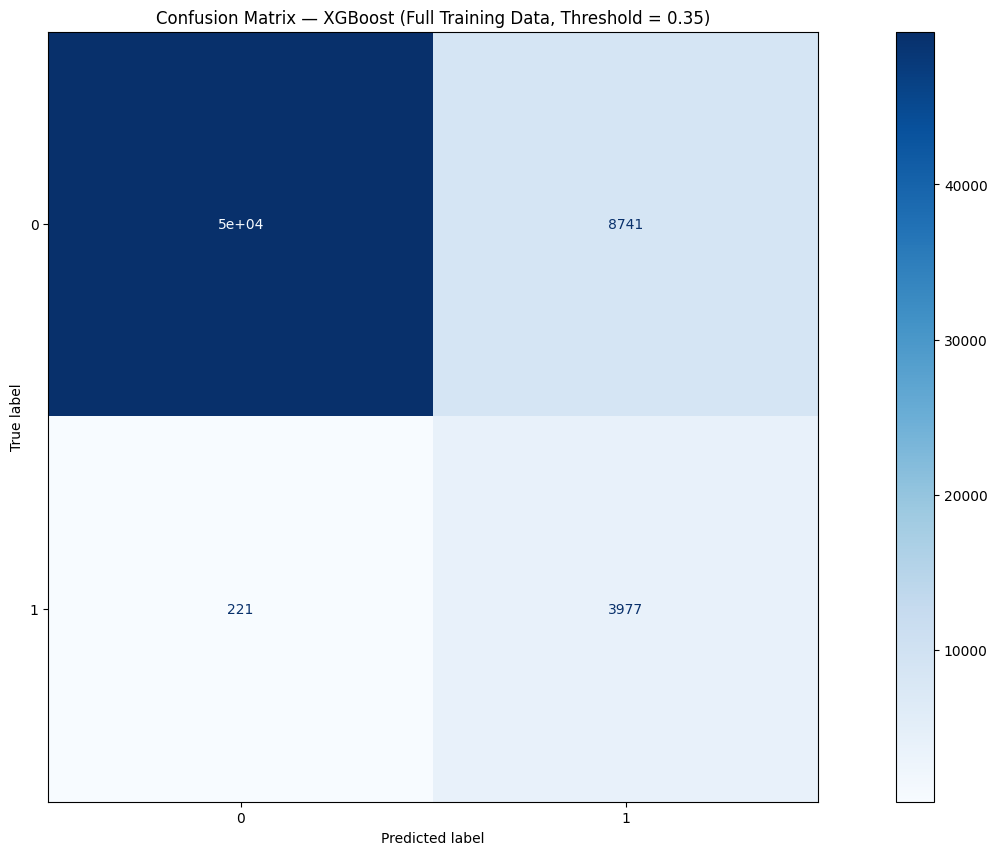

In [89]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict probabilities on the full dataset
y_proba_full = xgb_final.predict_proba(X)[:, 1]

# Apply the same tuned threshold
threshold = 0.35
y_pred_full = (y_proba_full >= threshold).astype(int)

# Generate report
print("\nFinal XGBoost Model Performance on Full Training Data (Threshold = 0.35)\n")
print(classification_report(y, y_pred_full, digits=3))

# Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y, y_pred_full, cmap='Blues')
plt.title("Confusion Matrix — XGBoost (Full Training Data, Threshold = 0.35)")
plt.show()
